<a href="https://colab.research.google.com/github/TrKer1121/Emotion_TranTrungKien_1914346/blob/main/Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/drive/folders/174w56UHqDDsH9BbdbQni3XdQJpZ3LAy_?usp=sharing
#Import các thư viện
import cv2
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from random import randint
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Liên kết với google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Lấy data
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BIEUCAM/train',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BIEUCAM/vali',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [10]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3), activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(4,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 128)     

In [25]:
#Training
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 20, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
2/2 [==============================] - 7s 3s/step - loss: 114.0667 - accuracy: 0.6500
Epoch 2/20
2/2 [==============================] - 6s 3s/step - loss: 29.8486 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 6s 3s/step - loss: 9.7892 - accuracy: 0.5125
Epoch 4/20
2/2 [==============================] - 6s 3s/step - loss: 1.3765 - accuracy: 0.6125
Epoch 5/20
2/2 [==============================] - 6s 3s/step - loss: 0.9275 - accuracy: 0.6125
Epoch 6/20
2/2 [==============================] - 6s 3s/step - loss: 0.3921 - accuracy: 0.9000
Epoch 7/20
2/2 [==============================] - 6s 3s/step - loss: 0.4998 - accuracy: 0.8500
Epoch 8/20
2/2 [==============================] - 6s 3s/step - loss: 1.1561 - accuracy: 0.7875
Epoch 9/20
2/2 [==============================] - 6s 3s/step - loss: 0.1770 - accuracy: 0.9875
Epoch 10/20
2/2 [==============================] - 6s 3s/step - loss: 0.3835 - accuracy: 0.8000
Epoch 11/20
2/2 [=============================

Sai số kiểm tra là:  0.0014568829210475087
Độ chính xác kiểm tra là:  1.0


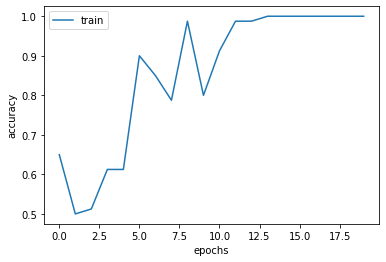

In [28]:
#đánh giá
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [29]:
#lưu model
model.save('emotionface.h5')

In [30]:
#load model
from keras.models import load_model
emotion=load_model('emotionface.h5')

0
buon


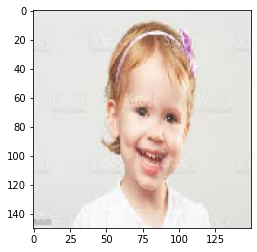

In [39]:
#nhận dạng
img_path = '/content/drive/MyDrive/Colab Notebooks/BIEUCAM/test/test_hp.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=img/255
pre=np.argmax(emotion.predict(img),axis=1)
pred = model.predict(img)
classes = ['buon', 'gian', 'so', 'vui']
print(np.argmax(pred))
if pre == 0:
  print(classes[0])
elif pre == 1:
    print(classes[1])
elif pre == 2:
    print(classes[2])
elif pre == 3:
    print(classes[3])
